## Commets from reviewer

<span style="color:green"> Hi! Congratulations on your first project :)You did a great job here! I really enjoyed your project, it's very deep and detailed. There is nothing that I can add to your work) Good luck with the next one! </span>

## Analyzing borrowers’ risk of defaulting

Your project is to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Your report will be considered when building a **credit scoring** of a potential customer. A ** credit scoring ** is used to evaluate the ability of a potential borrower to repay their loan.

### Step 1. Open the data file and have a look at the general information. 

In [647]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

><h2><strong>Describing data</strong></h2><div class="paragraph">—<em>children</em> : the number of children in the family </div><div class="paragraph">—<em>days_employed</em>: how long the customer has worked </div><div class="paragraph">—<em>dob_years</em>: the customer’s age </div><div class="paragraph">—<em>education</em>: the customer’s education level </div><div class="paragraph">—<em>education_id</em>: identifier for the customer’s education </div><div class="paragraph">—<em>family_status</em>: the customer’s marital status </div><div class="paragraph">—<em>family_status_id</em>: identifier for the customer’s marital status </div><div class="paragraph">—<em>gender</em>: the customer’s gender </div><div class="paragraph">—<em>income_type</em>: the customer’s income type </div><div class="paragraph">—<em>debt</em>: whether the client has ever defaulted on a loan </div><div class="paragraph">—<em>total_income</em>: monthly income </div><div class="paragraph">—<em>purpose</em>: reason for taking out a loan</div><h2>

In [648]:
borrowers_df = pd.read_csv('/datasets/credit_scoring_eng.csv')
borrowers_df.head()
borrowers_df.tail()
borrowers_df.sample(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,partner,0,224791.862382,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,155999.806512,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,89672.561153,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,244093.050500,buying my own car
21524,2,-1984.507589,40,secondary education,1,married,0,F,employee,0,82047.418899,to buy a car


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
1727,0,-3190.261472,39,secondary education,1,civil partnership,1,F,employee,0,155552.261155,profile education
21374,2,-3521.131923,44,secondary education,1,married,0,M,employee,0,185582.067274,buying my own car
3437,0,360097.546817,63,secondary education,1,married,0,M,retiree,0,106988.239546,to own a car
9399,0,NaN,49,secondary education,1,divorced,3,F,retiree,0,NaN,car
2149,1,-3598.983645,31,secondary education,1,civil partnership,1,F,civil servant,0,117418.417778,wedding ceremony


In [649]:
pd.concat([borrowers_df.dtypes, borrowers_df.isna().sum()], axis=1)

,0,1
children,int64,0
days_employed,float64,2174
dob_years,int64,0
education,object,0
education_id,int64,0
family_status,object,0
family_status_id,int64,0
gender,object,0
income_type,object,0
debt,int64,0


In [650]:
borrowers_df.describe(include='all')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
count,21525.000000,19351.000000,21525.000000,21525,21525.000000,21525,21525.000000,21525,21525,21525.000000,1.935100e+04,21525
unique,NaN,NaN,NaN,15,NaN,5,NaN,3,8,NaN,NaN,38
top,NaN,NaN,NaN,secondary education,NaN,married,NaN,F,employee,NaN,NaN,wedding ceremony
freq,NaN,NaN,NaN,13750,NaN,12380,NaN,14236,11119,NaN,NaN,797
mean,0.538908,63046.497661,43.293380,NaN,0.817236,NaN,0.972544,NaN,NaN,0.080883,1.674223e+05,NaN
std,1.381587,140827.311974,12.574584,NaN,0.548138,NaN,1.420324,NaN,NaN,0.272661,1.029716e+05,NaN
min,-1.000000,-18388.949901,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,2.066726e+04,NaN
25%,0.000000,-2747.423625,33.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,1.030532e+05,NaN
50%,0.000000,-1203.369529,42.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,1.450179e+05,NaN
75%,1.000000,-291.095954,53.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,2.034351e+05,NaN


In [651]:
borrowers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [652]:
#it's not days, we have huge gap, mean is 183 years 
(abs(borrowers_df["days_employed"])/365).describe()

count    19351.000000
mean       183.328024
std        380.906522
min          0.066141
25%          2.539751
50%          6.011563
75%         15.172281
max       1100.699727
Name: days_employed, dtype: float64

In [653]:
borrowers_df[borrowers_df['days_employed'] < 0]['days_employed'].count()
borrowers_df[borrowers_df['days_employed'] >= 0]['days_employed'].apply(lambda x: x / 365).describe()

15906

count    3445.000000
mean     1000.011808
std        57.739771
min       900.626632
25%       949.697024
50%      1000.584401
75%      1049.990258
max      1100.699727
Name: days_employed, dtype: float64

In [654]:
borrowers_df[(abs(borrowers_df['days_employed']) <= 75*365)]['days_employed'].count()

15906

Only negative value of days_employed are less than max of dobs_year

It seems that we have incorrect data in the column 'days_employed'. I assume that problem was appeared after saving in Excel (format problem). In Excel date format, as I know, uses ole datetime (in the C# we have DateTime.FromOADate method), https://docs.microsoft.com/en-us/dotnet/api/system.datetime.fromoadate?view=netframework-4.8  we can write the same method on the python. Also it could be epoch time since 1970 (problem is also unknown measure of our column. we have max=401755 and min=-18388, it is unlikely that our column in days, because diff between min and max in this case more than 1000 years)

In [655]:
from datetime import datetime, timedelta
import numpy as np
from math import isnan

OLE_TIME_ZERO = datetime(1899, 12, 30, 0, 0, 0)

def from_ole(ts:float)->datetime:
    if isnan(ts):
        return ts
    return OLE_TIME_ZERO + timedelta(days=float(ts/10))
def from_epoch(ts:float):
    if isnan(ts):
        return ts
    return datetime.fromtimestamp(ts*3600)
borrowers_df["days_employed"].min()
borrowers_df["days_employed"].max()
from_ole(borrowers_df["days_employed"].min())
from_ole(borrowers_df["days_employed"].max())
from_epoch(borrowers_df["days_employed"].min())
from_epoch(borrowers_df["days_employed"].max())
days = abs(borrowers_df["days_employed"])/abs(borrowers_df["days_employed"].min())
days.describe()

-18388.949900568383

401755.40047533

datetime.datetime(1894, 12, 17, 2, 31, 12, 859089)

datetime.datetime(2009, 12, 28, 12, 57, 40, 106851)

datetime.datetime(1967, 11, 26, 19, 3, 0, 357954)

datetime.datetime(2015, 10, 31, 19, 24, 1, 711188)

count    19351.000000
mean         3.638855
std          7.560567
min          0.001313
25%          0.050411
50%          0.119323
75%          0.301153
max         21.847653
Name: days_employed, dtype: float64

In [656]:
borrowers_df["date_employed"] = borrowers_df.apply(lambda row: from_ole(abs(row["days_employed"])), axis=1)

In [657]:
borrowers_df[["date_employed", "dob_years"]].sample(15)

,date_employed,dob_years
20745,1901-06-29 06:19:44.099689,53
18858,1900-10-14 02:45:34.195704,31
13775,1998-10-09 12:07:39.718928,55
21059,1900-08-26 06:58:37.270691,39
19685,1995-05-20 00:21:25.985373,65
8368,1900-05-01 06:08:48.211820,42
13530,1900-02-15 05:16:19.104468,23
9566,2002-05-11 12:46:05.470912,52
7783,1900-12-18 07:01:47.660261,39
4763,1900-07-31 03:28:38.735931,40


In [658]:
borrowers_df["date_employed"] = borrowers_df.apply(lambda row: from_epoch(abs(row["days_employed"])), axis=1)
borrowers_df[["date_employed", "dob_years"]].sample(5)

,date_employed,dob_years
13901,1971-02-15 05:42:01.649550,55
9049,1970-02-05 14:33:40.256555,43
13751,1970-01-29 08:58:42.284391,46
10907,1970-05-13 04:08:25.381330,52
631,1970-05-06 00:08:39.393682,51


As we see, idea with date_employed didn't work

In [659]:
borrowers_df = borrowers_df.drop('date_employed', axis=1)
borrowers_df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding


In [660]:
duplicates = borrowers_df[borrowers_df.duplicated()]
duplicates.sample(5)
100*len(duplicates)/len(borrowers_df)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
14432,2,NaN,36,masters degree,0,married,0,F,civil servant,0,NaN,getting an education
12736,0,NaN,59,secondary education,1,married,0,F,retiree,0,NaN,to become educated
19041,0,NaN,56,secondary education,1,civil partnership,1,F,employee,0,NaN,having a wedding
14832,0,NaN,50,secondary education,1,unmarried,4,F,employee,0,NaN,property
17774,1,NaN,40,secondary education,1,civil partnership,1,F,partner,0,NaN,building a real estate


0.2508710801393728

### Conclusion

* $\approx$ 10% of data in columns "days_employed", "income_type" is missed 
* days_employed" is incorrect column, it couldn't be negative, and it has unknown measure. we need fix it or drop this column
* we need specify one case for string (object) columns (for example: lower)
* we need categorize data and lemmatize (column "purpose")
* we need specify type of "days_employed" and "income_type"

* Dataset has 54 (0.3%) duplicate rows	
* days_employed has 2174 (10.1%) missing values	
* total_income has 2174 (10.1%) missing values
* some information has the same meaning like family_status and family_status_id

children - min=-1 and max=20, it's impossible
days_employed is wrong column, max is 401755, for days it's more than 1100years
dob_years - min=0 is incorrect

* total_income - Numeric
* purpose - Categorical
* income_type - Categorical
* gender - boolean
* family_status Categorical (family_status_id Numeric)
* education Categorical (education_id Numeric)
* dob_years Numeric
* debt Boolean
* days_employed Numeric
* children Numeric

<span style="color:green"> Very nice and deep approaches!

### Step 2. Data preprocessing

### Processing missing values

In [661]:
total = borrowers_df.isnull().sum().sort_values(ascending=False)
percent = (borrowers_df.isnull().sum()/borrowers_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])
missing_data['Missing Percent'] = missing_data['Missing Percent'].apply(lambda x: x * 100)
missing_data.loc[missing_data['Missing Percent'] > 10][:10]

,Total,Missing Percent
total_income,2174,10.099884
days_employed,2174,10.099884


~10% of missing data is a lot. let's see, there is a relation between missed data and other columns

In [662]:
df_nan = borrowers_df[borrowers_df['total_income'].isna()]
df_nan.groupby('education_id')['education_id'].count()

education_id
0     544
1    1540
2      69
3      21
Name: education_id, dtype: int64

In [663]:
borrowers_df[borrowers_df['days_employed'].isnull()].sample(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
19918,0,NaN,58,secondary education,1,married,0,F,partner,0,NaN,cars
4001,0,NaN,24,secondary education,1,civil partnership,1,M,employee,0,NaN,to have a wedding
17777,0,NaN,47,secondary education,1,married,0,F,employee,0,NaN,purchase of the house
15087,0,NaN,31,secondary education,1,civil partnership,1,F,partner,0,NaN,having a wedding
2212,0,NaN,44,masters degree,0,civil partnership,1,F,partner,0,NaN,wedding ceremony
20415,0,NaN,52,secondary education,1,married,0,F,partner,0,NaN,buy real estate
3442,0,NaN,60,secondary education,1,unmarried,4,F,retiree,0,NaN,purchase of the house for my family
14899,0,NaN,36,secondary education,1,married,0,F,retiree,0,NaN,cars
9725,0,NaN,55,secondary education,1,civil partnership,1,F,retiree,0,NaN,purchase of a car
18238,0,NaN,41,secondary education,1,unmarried,4,F,employee,1,NaN,cars


As wee see, we have ~10% data around 'total_income' and 'days_employed' at the same time. In my opinion it's hard to assume what data was missed and it's hard fairly interpolate 'total_income' and 'days_employed', but it's quantitative variables, missing values in quantitative variables are filled with representative values like average values. Logically correct to fill it depends on income_type, let's see

In [664]:
borrowers_df[borrowers_df['days_employed'].isna()].pivot_table(index='income_type',values='total_income' ,aggfunc='count')

,total_income
income_type,
civil servant,0
employee,0
entrepreneur,0
partner,0
retiree,0


In [665]:
median_income_type = borrowers_df.groupby('income_type').agg({'total_income': 'mean'}).reset_index()
median_income_type

,income_type,total_income
0,civil servant,170898.309923
1,employee,161380.260488
2,entrepreneur,499163.144947
3,partner,202417.461462
4,paternity / maternity leave,53829.130729
5,retiree,137127.465690
6,student,98201.625314
7,unempoyed,131339.751676


In [666]:
replacer_map = {row["income_type"]:row["total_income"] for i, row in median_income_type.iterrows()}
borrowers_df['total_income'] = borrowers_df['total_income'].fillna(borrowers_df["income_type"].map(replacer_map))
borrowers_df[borrowers_df['days_employed'].isnull()].sample(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
9395,0,NaN,28,secondary education,1,married,0,M,employee,0,161380.260488,to become educated
17304,2,NaN,37,secondary education,1,married,0,F,partner,0,202417.461462,property renovation
13350,2,NaN,45,secondary education,1,civil partnership,1,M,partner,0,202417.461462,having a wedding
14864,0,NaN,56,secondary education,1,widow / widower,2,F,retiree,0,137127.465690,supplementary education
17542,1,NaN,45,secondary education,1,married,0,F,retiree,0,137127.465690,buying a second-hand car


In [667]:
borrowers_df[borrowers_df['days_employed'].isnull()]['total_income'].value_counts()

161380.260488    1105
202417.461462     508
137127.465690     413
170898.309923     147
499163.144947       1
Name: total_income, dtype: int64

In [668]:
borrowers_df[borrowers_df['days_employed'].isnull()]['debt'].value_counts()

0    2004
1     170
Name: debt, dtype: int64

In [669]:
def fill_days_employed():
    global borrowers_df
    fillna_value("days_employed", borrowers_df['days_employed'].median())
def fillna_value(column, value):
    global borrowers_df
    borrowers_df[column].fillna(value, inplace=True)

In [670]:
borrowers_df = borrowers_df[pd.notnull(borrowers_df['days_employed'])]
borrowers_df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding


In [671]:
borrowers_df.describe(include='all')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
count,19351.000000,19351.000000,19351.000000,19351,19351.000000,19351,19351.000000,19351,19351,19351.000000,1.935100e+04,19351
unique,NaN,NaN,NaN,15,NaN,5,NaN,3,8,NaN,NaN,38
top,NaN,NaN,NaN,secondary education,NaN,married,NaN,F,employee,NaN,NaN,wedding ceremony
freq,NaN,NaN,NaN,12342,NaN,11143,NaN,12752,10014,NaN,NaN,721
mean,0.537388,63046.497661,43.255336,NaN,0.819079,NaN,0.972249,NaN,NaN,0.081184,1.674223e+05,NaN
std,1.371408,140827.311974,12.579170,NaN,0.550104,NaN,1.420596,NaN,NaN,0.273125,1.029716e+05,NaN
min,-1.000000,-18388.949901,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,2.066726e+04,NaN
25%,0.000000,-2747.423625,33.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,1.030532e+05,NaN
50%,0.000000,-1203.369529,42.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,1.450179e+05,NaN
75%,1.000000,-291.095954,53.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,2.034351e+05,NaN


as we see we have invalid values in the children's column - -1, 20. (max and min). assume, that -1 is 1 and 20 is 2, probably someone mistyped
les's correct it

In [672]:
borrowers_df['children'] = borrowers_df['children'].replace(-1, 1)
borrowers_df['children'] = borrowers_df['children'].replace(20, 2)
borrowers_df['days_employed']= abs(borrowers_df['days_employed'])
borrowers_df['gender'].unique()
borrowers_df[borrowers_df['gender']=='XNA']

array(['F', 'M', 'XNA'], dtype=object)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2358.600502,24,bachelor degree,2,civil partnership,1,XNA,partner,0,203905.157261,buy real estate


there is incorrect record with XNA gender. let's see, do we have other records with the same income_type

In [673]:
income_type = borrowers_df[borrowers_df['gender']=='XNA'].reset_index()['income_type'][0]
borrowers_df[borrowers_df['income_type'] == income_type].shape
borrowers_df.groupby('income_type').agg(['mean', 'count'])

(4577, 12)

children         days_employed         dob_years  \
                                 mean  count           mean  count       mean   
income_type                                                                     
civil servant                0.607470   1312    3399.896902   1312  40.570122   
employee                     0.573797  10014    2326.499216  10014  39.797783   
entrepreneur                 0.000000      1     520.848083      1  27.000000   
partner                      0.525672   4577    2111.524398   4577  39.654359   
paternity / maternity leave  2.000000      1    3296.759962      1  39.000000   
retiree                      0.095556   3443  365003.491245   3443  59.137090   
student                      0.000000      1     578.751554      1  22.000000   
unempoyed                    0.500000      2  366413.652744      2  38.000000   

                                   education_id        family_status_id  \
                             count         mean  count             mean   
income_type                                                               
civil servant                 1312     0.674543   1312         0.847561   
employee                     10014     0.850509  10014         0.958858   
entrepreneur                     1     0.000000      1         1.000000   
partner                       4577     0.720122   4577         1.027747   
paternity / maternity leave      1     1.000000      1         0.000000   
retiree                       3443     0.914900   3443         0.984606   
student                          1     0.000000      1         4.000000   
unempoyed                        2     0.500000      2         0.500000   

                                        debt          total_income         
                             count      mean  count           mean  count  
income_type                                                                
civil servant                 1312  0.060213   1312  170898.309923   1312  
employee                     10014  0.096165  10014  161380.260488  10014  
entrepreneur                     1  0.000000      1  499163.144947      1  
partner                       4577  0.075595   4577  202417.461462   4577  
paternity / maternity leave      1  1.000000      1   53829.130729      1  
retiree                       3443  0.052570   3443  137127.465690   3443  
student                          1  0.000000      1   98201.625314      1  
unempoyed                        2  0.500000      2  131339.751676      2

There are 5085 records with 'partner' income_type. And we have only 1 record with incorrect gender value. 
We could delete this record

In [674]:
borrowers_df = borrowers_df[borrowers_df['gender'] != 'XNA']
borrowers_df[borrowers_df['gender']=='XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


### Conclusion

As wee see, we have ~10% data around 'total_income' and 'days_employed' at the same time. In my opinion it's hard to assume what data was missed and it's hard fairly interpolate 'total_income' and 'days_employed', it's quantitative Variables, missing values in quantitative variables are filled with representative values. 

### Data type replacement

In [675]:
borrowers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19350 entries, 0 to 21524
Data columns (total 12 columns):
children            19350 non-null int64
days_employed       19350 non-null float64
dob_years           19350 non-null int64
education           19350 non-null object
education_id        19350 non-null int64
family_status       19350 non-null object
family_status_id    19350 non-null int64
gender              19350 non-null object
income_type         19350 non-null object
debt                19350 non-null int64
total_income        19350 non-null float64
purpose             19350 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 1.9+ MB


In [676]:
borrowers_df['days_employed'].sample(5)

3161     375438.825005
4558       3192.829889
10389      1205.335074
8922       1315.453550
15293       839.270062
Name: days_employed, dtype: float64

In [677]:
borrowers_df['total_income'].sample(5)

11591    138556.980520
13151    302603.411178
14840    268756.734797
3071     222613.255388
18424    197628.284210
Name: total_income, dtype: float64

In [678]:
borrowers_df['total_income'].dtypes

dtype('float64')

In [679]:
borrowers_df['days_employed'] = borrowers_df['days_employed'].astype(int, errors='ignore')
borrowers_df['total_income'] = borrowers_df['total_income'].astype(int, errors='ignore')

In [680]:
borrowers_df['total_income'].dtypes

dtype('int64')

### Conclusion

We converted days_employed and total_income from float to int type, to optimize computing and memory usage

### Processing duplicates

In [681]:
borrowers_df['education'].value_counts()

secondary education    12342
masters degree          4222
SECONDARY EDUCATION      705
Secondary Education      646
bachelor degree          612
MASTERS DEGREE           251
Masters Degree           243
primary education        231
Bachelor Degree           40
BACHELOR DEGREE           22
PRIMARY EDUCATION         16
Primary Education         14
academic degree            4
ACADEMIC DEGREE            1
Academic Degree            1
Name: education, dtype: int64

In [682]:
def to_case():
    global borrowers_df
    borrowers_df['education'] = borrowers_df['education'].str.lower()
    borrowers_df['family_status'] = borrowers_df['family_status'].str.lower()
    borrowers_df['gender'] = borrowers_df['gender'].str.upper()
    borrowers_df['income_type'] = borrowers_df['income_type'].str.lower()
    borrowers_df['purpose'] = borrowers_df['purpose'].str.lower()

In [683]:
to_case()

In [684]:
borrowers_df.duplicated().sum()
borrowers_df[borrowers_df.duplicated()].sort_values('education').head()

0

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


In [685]:
borrowers_df = borrowers_df.drop_duplicates().reset_index(drop=True)
borrowers_df.duplicated().sum()

0

### Conclusion

Drop duplicates is logically correct when we have differences only in string cases. Also we have duplicates by meaning in "purpose" column. That's why we need to do lemmatizaion

<span style="color:green"> Great job with preprocessing)

### Lemmatization

In [686]:
purposes = borrowers_df['purpose'].unique()
display(purposes)
len(purposes)

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car',
       'transactions with the residential real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'getting an education', 'second-hand car purchase', 'car',
       'wedding ceremony', 'to get asupplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'building a real estate', 'property renovation',
 

38

In [687]:
import nltk
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
stopwords = set(stopwords.words('english'))
is_noun = lambda pos: pos[:2] == 'NN'

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [688]:
wordnet_lemma = WordNetLemmatizer()
lemmas = []
for text in purposes:
    words = nltk.word_tokenize(text.lower())
    lemmas += [wordnet_lemma.lemmatize(w, pos='n') for (w,pos) in nltk.pos_tag(words) if w not in stopwords and is_noun(pos)]
purpose_categories = list(Counter(lemmas).keys())
purpose_categories

['purchase',
 'house',
 'car',
 'education',
 'wedding',
 'housing',
 'transaction',
 'family',
 'estate',
 'construction',
 'property',
 'second-hand',
 'ceremony',
 'profile',
 'university',
 'renovation']

In [689]:
from nltk.stem import SnowballStemmer 
english_stemmer = SnowballStemmer('english')

In [690]:
category_purpose_dict = {text_purpose:next(category for category in purpose_categories if english_stemmer.stem(category) in text_purpose or category in text_purpose) for text_purpose in set(borrowers_df['purpose'])}
category_purpose_dict

{'education': 'education',
 'to get asupplementary education': 'education',
 'housing transactions': 'house',
 'buy real estate': 'estate',
 'purchase of my own house': 'purchase',
 'to own a car': 'car',
 'cars': 'car',
 'car': 'car',
 'getting an education': 'education',
 'transactions with the residential real estate': 'transaction',
 'building a real estate': 'estate',
 'wedding ceremony': 'wedding',
 'second-hand car purchase': 'purchase',
 'purchase of a car': 'purchase',
 'housing': 'house',
 'purchase of the house for my family': 'purchase',
 'supplementary education': 'education',
 'to have a wedding': 'wedding',
 'profile education': 'education',
 'purchase of the house': 'purchase',
 'to become educated': 'education',
 'to buy a car': 'car',
 'buying property for renting out': 'property',
 'getting higher education': 'education',
 'building a property': 'property',
 'going to university': 'university',
 'construction of own property': 'construction',
 'buy residential real e

In [691]:
#some hand fixing
for k, v in category_purpose_dict.items():
    if not v=='car' and 'car' in k:
        category_purpose_dict[k] = 'car'
        continue
    if not v=='house' and ('estate' in k or 'house' in k):
        category_purpose_dict[k] = 'house'
        continue
    if not v=='property' and ('construction' in k or 'property' in k):
        category_purpose_dict[k] = 'property'
        continue
category_purpose_dict

{'education': 'education',
 'to get asupplementary education': 'education',
 'housing transactions': 'house',
 'buy real estate': 'house',
 'purchase of my own house': 'house',
 'to own a car': 'car',
 'cars': 'car',
 'car': 'car',
 'getting an education': 'education',
 'transactions with the residential real estate': 'house',
 'building a real estate': 'house',
 'wedding ceremony': 'wedding',
 'second-hand car purchase': 'car',
 'purchase of a car': 'car',
 'housing': 'house',
 'purchase of the house for my family': 'house',
 'supplementary education': 'education',
 'to have a wedding': 'wedding',
 'profile education': 'education',
 'purchase of the house': 'house',
 'to become educated': 'education',
 'to buy a car': 'car',
 'buying property for renting out': 'property',
 'getting higher education': 'education',
 'building a property': 'property',
 'going to university': 'university',
 'construction of own property': 'property',
 'buy residential real estate': 'house',
 'buying my ow

In [692]:
borrowers_df['purpose'] = borrowers_df['purpose'].replace(category_purpose_dict)
borrowers_df.sample(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2717,1,2076,41,secondary education,1,divorced,3,F,employee,0,133722,house
9984,0,477,40,secondary education,1,divorced,3,F,employee,0,199429,car
1335,2,6803,45,masters degree,0,divorced,3,F,employee,0,140915,property
10079,0,385905,60,secondary education,1,widow / widower,2,F,retiree,0,274834,car
7058,1,5697,39,primary education,3,married,0,M,employee,0,199833,education


### Conclusion

For our purposes(for example - classification) we need to process our data (purpose column) which is represented by sentences on natural language.  Therefore column of purpose has been lemmatized, it will be easier categorize our data in the future 

<span style="color:green"> Lemmatization is done nicely

### Categorizing Data

* purpose - Categorical
* income_type - Categorical
* gender - Categorical
* family_status - Categorical
* education - Categorical

In [693]:
to_case()

In [694]:
borrowers_df.drop_duplicates(['family_status_id', 'family_status'])[['family_status_id', 'family_status']]

,family_status_id,family_status
0,0,married
4,1,civil partnership
17,2,widow / widower
18,3,divorced
23,4,unmarried


In [695]:
borrowers_df.drop_duplicates(['education_id', 'education'])[['education_id', 'education']]

,education_id,education
0,0,masters degree
1,1,secondary education
12,2,bachelor degree
28,3,primary education
2685,4,academic degree


As we see, there is no problem with education_id, education and family_status_id, family_status, those columns have identical length and meaning, there is no gap. We could encode categorical columns or just use id for this purpose

In [696]:
map_purpose = {purpose:index for index, purpose in enumerate(borrowers_df['purpose'].unique())}
map_purpose
map_gender = {'F':1,'M':0}
map_income_type = {income_type:index for index, income_type in enumerate(borrowers_df['income_type'].unique())}
map_income_type
map_family_status = {row['family_status_id']:row['family_status'] for _, row in borrowers_df.drop_duplicates(['family_status_id', 'family_status'])[['family_status_id', 'family_status']].iterrows()}
map_family_status
map_education = {row['education_id']:row['education'] for _, row in borrowers_df.drop_duplicates(['education_id', 'education'])[['education_id', 'education']].iterrows()}
map_education

{'house': 0,
 'car': 1,
 'education': 2,
 'wedding': 3,
 'property': 4,
 'university': 5}

{'employee': 0,
 'retiree': 1,
 'partner': 2,
 'civil servant': 3,
 'unempoyed': 4,
 'student': 5,
 'entrepreneur': 6,
 'paternity / maternity leave': 7}

{0: 'married',
 1: 'civil partnership',
 2: 'widow / widower',
 3: 'divorced',
 4: 'unmarried'}

{0: 'masters degree',
 1: 'secondary education',
 2: 'bachelor degree',
 3: 'primary education',
 4: 'academic degree'}

In [697]:
# alternative method is LabelEncoder
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
def process_income_type():
    global borrowers_df
    borrowers_df['income_type_id'] = borrowers_df['income_type'].map(map_income_type)
def process_purpose():
    global borrowers_df
    borrowers_df["purpose_id"] = borrowers_df["purpose"].map(map_purpose)
#     borrowers_df['purpose'] = le.fit_transform(borrowers_df['purpose'])
def process_gender():
    global borrowers_df
    borrowers_df['gender_id'] = borrowers_df['gender'].map(map_gender)
    borrowers_df['gender_id'] = borrowers_df['gender_id'].astype(int)
#     borrowers_df["gender"] = borrowers_df["gender"].astype('category')
#     borrowers_df["gender"] = borrowers_df["gender"].cat.codes
def delete_columns():
    global borrowers_df
    cols = ['income_type', 'gender', 'purpose', 'education', 'family_status']
    borrowers_df = borrowers_df.drop([col for col in cols if col in borrowers_df.columns], axis=1)

In [698]:
process_income_type()
process_purpose()
process_gender()
borrowers_df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,income_type_id,purpose_id,gender_id
0,1,8437,42,masters degree,0,married,0,F,employee,0,253875,house,0,0,1
1,1,4024,36,secondary education,1,married,0,F,employee,0,112080,car,0,1,1
2,0,5623,33,secondary education,1,married,0,M,employee,0,145885,house,0,0,0
3,3,4124,32,secondary education,1,married,0,M,employee,0,267628,education,0,2,0
4,0,340266,53,secondary education,1,civil partnership,1,F,retiree,0,158616,wedding,1,3,1


In [699]:
delete_columns()
borrowers_df.head()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income,income_type_id,purpose_id,gender_id
0,1,8437,42,0,0,0,253875,0,0,1
1,1,4024,36,1,0,0,112080,0,1,1
2,0,5623,33,1,0,0,145885,0,0,0
3,3,4124,32,1,0,0,267628,0,2,0
4,0,340266,53,1,1,0,158616,1,3,1


In [700]:
borrowers_df['total_income'].describe()

count    1.935000e+04
mean     1.674199e+05
std      1.029739e+05
min      2.066700e+04
25%      1.030405e+05
50%      1.450110e+05
75%      2.034235e+05
max      2.265604e+06
Name: total_income, dtype: float64

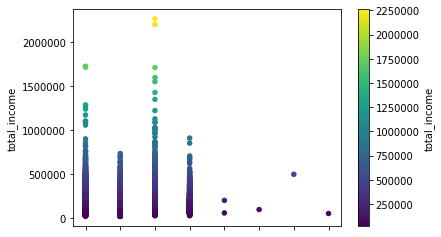

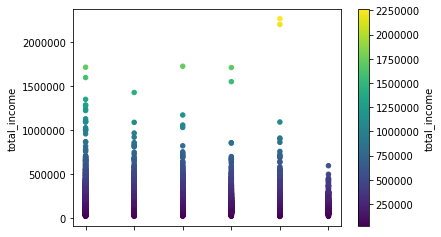

In [701]:
borrowers_df.plot.scatter(x='income_type_id',
                      y='total_income',
                      c= 'total_income',
                      colormap='viridis')
borrowers_df.plot.scatter(x='purpose_id',
                      y='total_income',
                      c= 'total_income',
                      colormap='viridis')

In [702]:
borrowers_df[['dob_years', 'total_income', 'children']].describe()

def category_total_income(total_income):
    if total_income < 75000:
        return 0
    elif 75000 <= total_income < 120000:
        return 1
    elif 120000 <= total_income < 150000:
        return 2
    elif 150000 <= total_income < 200000:
        return 3
    else:
        return 4
    
def category_children(children):
    if children < 1:
        return 0
    elif 1 <= children < 3:
        return 1
    else:
        return 2

def category_dob_years(dob_years):
    if dob_years < 35:
        return 0
    elif 35 <= dob_years < 45:
        return 1
    else:
        return 2
    
def process_categorize():
    global borrowers_df 
    borrowers_df['children_category'] = borrowers_df['children'].apply(category_children)
    borrowers_df['total_income_category'] = borrowers_df['total_income'].apply(category_total_income)
    borrowers_df['dob_years_category'] = borrowers_df['dob_years'].apply(category_dob_years)
    

,dob_years,total_income,children
count,19350.000000,1.935000e+04,19350.000000
mean,43.256331,1.674199e+05,0.479638
std,12.578734,1.029739e+05,0.753906
min,0.000000,2.066700e+04,0.000000
25%,33.000000,1.030405e+05,0.000000
50%,42.000000,1.450110e+05,0.000000
75%,53.000000,2.034235e+05,1.000000
max,75.000000,2.265604e+06,5.000000


In [703]:
process_categorize()
borrowers_df.head()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income,income_type_id,purpose_id,gender_id,children_category,total_income_category,dob_years_category
0,1,8437,42,0,0,0,253875,0,0,1,1,4,1
1,1,4024,36,1,0,0,112080,0,1,1,1,1,1
2,0,5623,33,1,0,0,145885,0,0,0,0,2,0
3,3,4124,32,1,0,0,267628,0,2,0,2,4,0
4,0,340266,53,1,1,0,158616,1,3,1,0,3,2


### Conclusion

Categorization is important task, and we categorized 'dob_years', 'total_income' and 'children'columns. Purpose, gender, family_status, education were encoded. It's important step in the EDA, in the future we could use this columns for example for building some models(decision tree).

<span style="color:green"> This step is correct

### Step 3. Answer these questions

- Is there a relation between having kids and repaying a loan on time?

In [704]:
borrowers_df['has_children'] = borrowers_df['children'].apply(lambda c: int(c>0))
borrowers_df_children = borrowers_df[borrowers_df['debt']==0].groupby(['children','debt']).size().reset_index().merge(borrowers_df[borrowers_df['debt']==1].groupby(['children','debt']).size().reset_index(), on='children')
borrowers_df_children["rate"] = 100*borrowers_df_children["0_y"]/borrowers_df_children["0_x"]
borrowers_df_children

,children,debt_x,0_x,debt_y,0_y,rate
0,0,0,11757,1,952,8.097304
1,1,0,3978,1,409,10.281549
2,2,0,1733,1,185,10.675130
3,3,0,272,1,22,8.088235
4,4,0,31,1,3,9.677419


In [705]:
borrowers_df_children = borrowers_df[borrowers_df['debt']==0].groupby(['children_category','debt']).size().reset_index().merge(borrowers_df[borrowers_df['debt']==1].groupby(['children_category','debt']).size().reset_index(), on='children_category')
borrowers_df_children["rate"] = 100*borrowers_df_children["0_y"]/borrowers_df_children["0_x"]
borrowers_df_children

,children_category,debt_x,0_x,debt_y,0_y,rate
0,0,0,11757,1,952,8.097304
1,1,0,5711,1,594,10.400981
2,2,0,311,1,25,8.038585


as we could see, there is a difference between borrowers that having kids and repaying a loan on time, 
but it's not like that in relative figures, because we see an equal distribution 

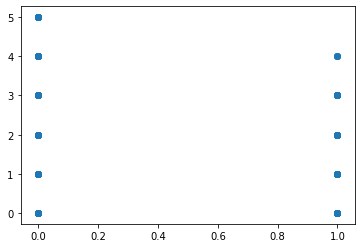

In [706]:
plt.scatter(borrowers_df['debt'], borrowers_df['children'])
plt.show()

Let's see Spearman correlation. The sign of the Spearman correlation indicates the direction of association between X (the independent variable) and Y (the dependent variable). If Y tends to increase when X increases, the Spearman correlation coefficient is positive. If Y tends to decrease when X increases, the Spearman correlation coefficient is negative. A Spearman correlation of zero indicates that there is no tendency for Y to either increase or decrease when X increases. The Spearman correlation increases in magnitude as X and Y become closer to being perfectly monotone functions of each other.

In [707]:
borrowers_df[['children_category', 'debt']].corr(method='spearman')
borrowers_df[['children', 'debt']].corr(method='spearman')

,children_category,debt
children_category,1.000000,0.030817
debt,0.030817,1.000000


,children,debt
children,1.000000,0.030879
debt,0.030879,1.000000


### Conclusion

A relation between having kids and repaying a loan on time is weak. We tried to find some correlation using Spearman correlation. People without kids have less problems with repaying a loan on time

- Is there a relation between marital status and repaying a loan on time?

In [708]:
borrowers_df_family = borrowers_df[borrowers_df['debt']==0].groupby(['family_status_id','debt']).size().reset_index().merge(borrowers_df[borrowers_df['debt']==1].groupby(['family_status_id','debt']).size().reset_index(), on='family_status_id')
borrowers_df_family["rate"] = 100*borrowers_df_family["0_y"]/borrowers_df_family["0_x"]
borrowers_df_family["family_status"] = borrowers_df_family["family_status_id"].map(map_family_status)
borrowers_df_family

,family_status_id,debt_x,0_x,debt_y,0_y,rate,family_status
0,0,0,10297,1,846,8.215985,married
1,1,0,3395,1,339,9.985272,civil partnership
2,2,0,809,1,56,6.922126,widow / widower
3,3,0,1007,1,76,7.547170,divorced
4,4,0,2271,1,254,11.184500,unmarried


In [709]:
borrowers_df[['family_status_id', 'debt']].corr(method='spearman')

,family_status_id,debt
family_status_id,1.000000,0.023246
debt,0.023246,1.000000


### Conclusion

We have the same picture like before. There is weak relation, it looks like widow / widower and divorced groups have good figures. 

- Is there a relation between income level and repaying a loan on time?

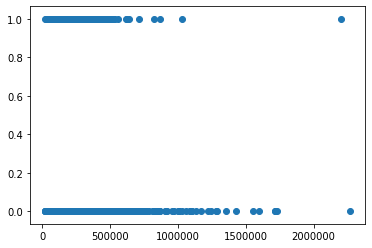

In [710]:
plt.scatter(borrowers_df['total_income'], borrowers_df['debt'])
plt.show()

In [711]:
map_total_income = {0:'<75000', 1:'[75000, 120000)',2:'[120000, 150000)',3:'[150000,200000)',4:'>=200000'}
borrowers_df_income = borrowers_df[borrowers_df['debt']==0].groupby(['total_income_category','debt']).size().reset_index().merge(borrowers_df[borrowers_df['debt']==1].groupby(['total_income_category','debt']).size().reset_index(), on='total_income_category')
borrowers_df_income["rate"] = 100*borrowers_df_income["0_y"]/borrowers_df_income["0_x"]
borrowers_df_income["total_income_title"] = borrowers_df_income["total_income_category"].map(map_total_income)
borrowers_df_income

,total_income_category,debt_x,0_x,debt_y,0_y,rate,total_income_title
0,0,0,1729,1,136,7.865818,<75000
1,1,0,4565,1,415,9.090909,"[75000, 120000)"
2,2,0,3028,1,294,9.709379,"[120000, 150000)"
3,3,0,3750,1,368,9.813333,"[150000,200000)"
4,4,0,4707,1,358,7.605694,>=200000


In [712]:
borrowers_df[['total_income_category', 'debt']].corr(method='spearman')

,total_income_category,debt
total_income_category,1.000000,-0.008506
debt,-0.008506,1.000000


### Conclusion

There is a weak negative correlation, but it close to zero. Also we could notice, clients with <75000 and >=200000 total_income have best figures 

- How do different loan purposes affect on-time repayment of the loan?

In [713]:
borrowers_df.head()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income,income_type_id,purpose_id,gender_id,children_category,total_income_category,dob_years_category,has_children
0,1,8437,42,0,0,0,253875,0,0,1,1,4,1,1
1,1,4024,36,1,0,0,112080,0,1,1,1,1,1,1
2,0,5623,33,1,0,0,145885,0,0,0,0,2,0,0
3,3,4124,32,1,0,0,267628,0,2,0,2,4,0,1
4,0,340266,53,1,1,0,158616,1,3,1,0,3,2,0


In [714]:
map_purpose_reverse = {v:k for k, v in map_purpose.items()}
borrowers_df_purpose = borrowers_df[borrowers_df['debt']==0].groupby(['purpose_id','debt']).size().reset_index().merge(borrowers_df[borrowers_df['debt']==1].groupby(['purpose_id','debt']).size().reset_index(), on='purpose_id')
borrowers_df_purpose["rate"] = 100*borrowers_df_purpose["0_y"]/borrowers_df_purpose["0_x"]
borrowers_df_purpose["purpose"] = borrowers_df_purpose["purpose_id"].map(map_purpose_reverse)
borrowers_df_purpose

,purpose_id,debt_x,0_x,debt_y,0_y,rate,purpose
0,0,0,6423,1,511,7.955784,house
1,1,0,3530,1,367,10.396601,car
2,2,0,2865,1,292,10.191972,education
3,3,0,1941,1,158,8.140134,wedding
4,4,0,2619,1,204,7.789233,property
5,5,0,401,1,39,9.725686,university


In [715]:
borrowers_df[['purpose_id', 'debt']].corr(method='spearman')

,purpose_id,debt
purpose_id,1.000000,0.005156
debt,0.005156,1.000000


### Conclusion

There is weak relation between purpose of loan and debt. As we saw, a majority of debtors are from 'car' and 'education' groups

### Step 4. General conclusion

It's important to analyze data and find out some dependencies and correlations for building a highly accurate predictive algorithm that could predict the creditworthiness of the clients. However, in general, no correlation has been identified. There is a weak correlation between having children, also purposes of loans could impact the picture of the credit score in general speaking. It can be assumed that there is correlation between multiple features at the same time. Also we could describe portrait of good client, - without kids, with total income more than 200000, and with purposes on loan    

<span style="color:green"> Step 3 and Step 4 are great! Congratulations!

### Project Readiness Checklist

Put 'x' in the completed points. Then press Shift + Enter.

- [x]  file open;
- [ ]  file examined;
- [ ]  missing values defined;
- [ ]  missing values are filled;
- [ ]  an explanation of which missing value types were detected;
- [ ]  explanation for the possible causes of missing values;
- [ ]  an explanation of how the blanks are filled;
- [ ]  replaced the real data type with an integer;
- [ ]  an explanation of which method is used to change the data type and why;
- [ ]  duplicates deleted;
- [ ]  an explanation of which method is used to find and remove duplicates;
- [ ]  description of the possible reasons for the appearance of duplicates in the data;
- [ ]  highlighted lemmas in the values of the loan purpose column;
- [ ]  the lemmatization process is described;
- [ ]  data is categorized;
- [ ]  an explanation of the principle of data categorization;
- [ ]  an answer to the question "Is there a relation between having kids and repaying a loan on time?";
- [ ]  an answer to the question " Is there a relation between marital status and repaying a loan on time?";
- [ ]   an answer to the question " Is there a relation between income level and repaying a loan on time?";
- [ ]  an answer to the question " How do different loan purposes affect on-time repayment of the loan?"
- [ ]  conclusions are present on each stage;
- [ ]  a general conclusion is made.